## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats 
import scipy.stats as st

In [18]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path =  "data/Study_results.csv"


In [23]:
# Read the mouse data and the study results
MouseData =  pd.read_csv(mouse_metadata_path)
StudyResults = pd.read_csv(study_results_path)

In [25]:
# Combine the data into a single dataset
# Display the data table for preview

combinedData = pd.merge(MouseData,StudyResults,on = "Mouse ID")
combinedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice.
miceCount = len(combinedData["Mouse ID"].unique())
miceCount 

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

miceGroup = combinedData.reset_index().groupby(["Mouse ID","Timepoint"])[["index"]].count()

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
dupilacatedData = miceGroup.loc[miceGroup["index"]>1]
dupilacatedData

index
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanMiceGroup = combinedData.loc[combinedData["Mouse ID"]!= "g989"]
CleanMiceGroup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
CleanMiceCount = len(CleanMiceGroup["Mouse ID"].unique())
CleanMiceCount 

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

MeanTumorVolume = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
MediaTumorVolume = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median() 
VarianceTumorVolume = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
StandardDeviationTumorVolume = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEMTumorVolume = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [46]:
SummaryStatisticsDF = pd.DataFrame({'Mean':MeanTumorVolume,'Median':MeanTumorVolume,'Variance':VarianceTumorVolume,'Standard Deviation':StandardDeviationTumorVolume,'SEM':SEMTumorVolume})
SummaryStatisticsDF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


SumaggMethod = CleanMiceGroup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
SumaggMethod


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
TotalMice = (CleanMiceGroup.groupby('Drug Regimen').count()).reset_index()
TotalMice 

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [61]:
MiceDrugs = TotalMice[["Drug Regimen",'Mouse ID']]
MiceDrugs = MiceDrugs.rename(columns={"Mouse ID":"Total Mice per Drug"})
MiceDrugs

,Drug Regimen,Total Mice per Drug
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


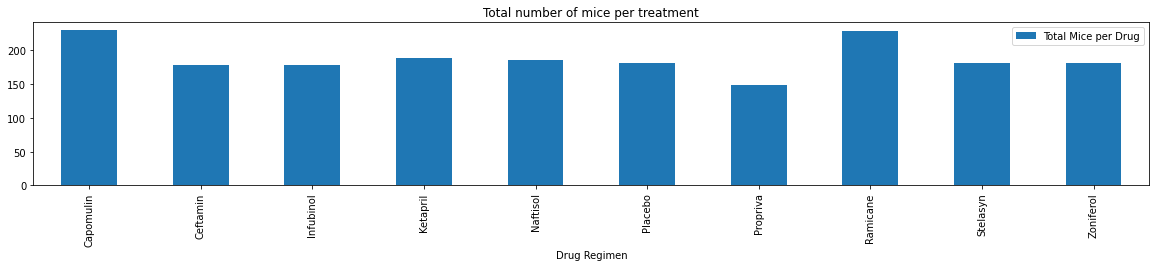

<Figure size 432x288 with 0 Axes>

In [53]:
MiceDrugs = MiceDrugs.set_index("Drug Regimen")
MiceDrugs.plot(kind="bar", figsize = (20,3))
plt.title("Total number of mice per treatment")
plt.show()
plt.tight_layout()

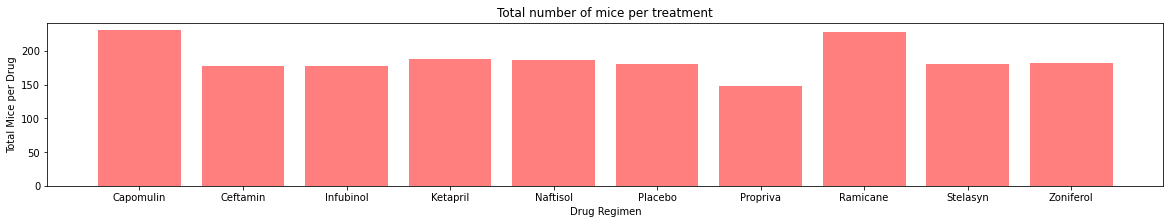

<Figure size 432x288 with 0 Axes>

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
TotalMice = TotalMice[["Drug Regimen"]]
Drug_Regimen = TotalMice["Drug Regimen"].tolist()
x_axis = Drug_Regimen
plt.figure(figsize=(20,3))
plt.bar(x_axis, MiceDrugs["Total Mice per Drug"], color='r', alpha=0.5, align="center")
plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice per Drug")
plt.show()
plt.tight_layout()

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexGroup = (CleanMiceGroup.groupby('Sex').count()).reset_index()
SexGroup

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [64]:
Female_vs_Male = SexGroup[["Sex","Mouse ID"]]
Female_vs_Male= Female_vs_Male.rename(columns={"Mouse ID":"Total"})
Female_vs_Male

,Sex,Total
0,Female,922
1,Male,958


(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

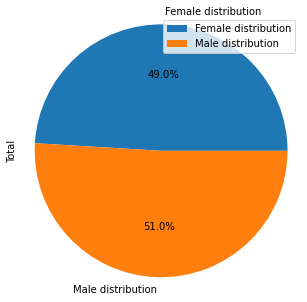

In [71]:
Female_vs_Male_df = pd.DataFrame({'Sex':["Female","Male"],'Total':[922,958]},index=['Female distribution','Male distribution'])
Female_vs_Male_plot = Female_vs_Male_df.plot.pie(autopct="%1.1f%%",y='Total',figsize=(5,5))
plt.axis("equal")

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex = ["Female distribution","Male distribution"]
Total = [922,958]
colors = ["yellow","green"]
explode = (0.1,0)

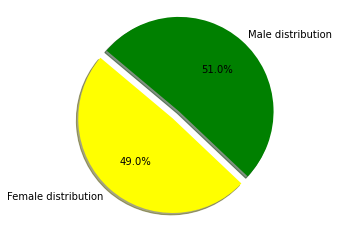

In [70]:
plt.pie(Total, explode=explode, labels=Sex, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [72]:
FinalVolume = CleanMiceGroup.loc[CleanMiceGroup["Timepoint"]==45]
FinalVolume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [73]:
TumorVolume = FinalVolume.loc[(FinalVolume["Drug Regimen"]=="Capomulin"),:]


In [78]:
quartiles = TumorVolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")

The lower quartile of Volume is: 32.37735684
The upper quartile of Volume is: 40.1592203
The interquartile range of Volume is: 7.781863460000004
The the median of Volume is: 37.31184577 


In [83]:
lowerBound = lowerq - (1.5*iqr)
upperBound = upperq + (1.5*iqr)
print(f"Values below {lowerBound} could be outliers.")
print(f"Values above {upperBound} could be outliers.")

OutlierVolume = TumorVolume.loc[(TumorVolume['Tumor Volume (mm3)'] < lowerBound)|(TumorVolume['Tumor Volume (mm3)'] > upperBound)]
OutlierVolume

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


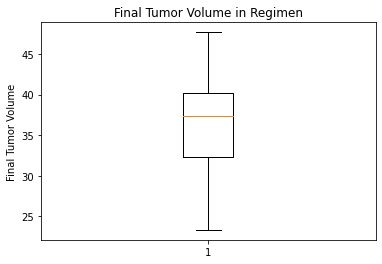

In [84]:
Volume = TumorVolume['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Volume)
plt.show()

In [85]:
RamicaneTumorVolume = FinalVolume.loc[(FinalVolume["Drug Regimen"]=="Ramicane"),:]

In [86]:
quartiles = RamicaneTumorVolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")

The lower quartile of Volume is: 30.981175225
The upper quartile of Volume is: 38.5083053075
The interquartile range of Volume is: 7.527130082500001
The the median of Volume is: 34.848627300000004 


In [90]:
lowerBound = lowerq - (1.5*iqr)
upperBound = upperq + (1.5*iqr)
print(f"Values below {lowerBound} could be outliers.")
print(f"Values above {upperBound} could be outliers.")

OutlierVolume = RamicaneTumorVolume.loc[(RamicaneTumorVolume['Tumor Volume (mm3)'] < lowerBound)|(RamicaneTumorVolume['Tumor Volume (mm3)'] > upperBound)]
OutlierVolume

Values below 19.69048010125 could be outliers.
Values above 49.79900043125001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


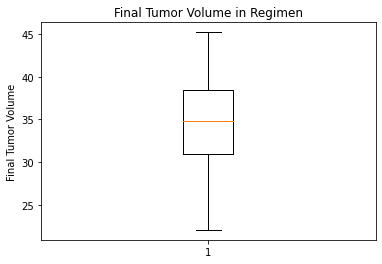

In [91]:
Volume = RamicaneTumorVolume['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Volume)
plt.show()

In [92]:
InfubinolTumorVolume = FinalVolume.loc[(FinalVolume["Drug Regimen"]=="Infubinol"),:]

In [93]:
quartiles = InfubinolTumorVolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")

The lower quartile of Volume is: 62.75445141
The upper quartile of Volume is: 67.68556862
The interquartile range of Volume is: 4.9311172099999965
The the median of Volume is: 66.08306589 


In [94]:
lowerBound = lowerq - (1.5*iqr)
upperBound = upperq + (1.5*iqr)
print(f"Values below {lowerBound} could be outliers.")
print(f"Values above {upperBound} could be outliers.")

OutlierVolume = InfubinolTumorVolume.loc[(InfubinolTumorVolume['Tumor Volume (mm3)'] < lowerBound)|(InfubinolTumorVolume['Tumor Volume (mm3)'] > upperBound)]
OutlierVolume

Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


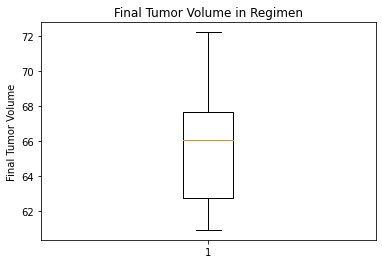

In [95]:
Volume = InfubinolTumorVolume['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Volume)
plt.show()

In [109]:
CeftaminTumorVolume = FinalVolume.loc[(FinalVolume["Drug Regimen"]=="Ceftamin"),:]

In [110]:
quartiles = CeftaminTumorVolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")

The lower quartile of Volume is: 61.43389223
The upper quartile of Volume is: 67.52748237
The interquartile range of Volume is: 6.093590140000003
The the median of Volume is: 64.29983003 


In [111]:
lowerBound = lowerq - (1.5*iqr)
upperBound = upperq + (1.5*iqr)
print(f"Values below {lowerBound} could be outliers.")
print(f"Values above {upperBound} could be outliers.")

OutlierVolume = CeftaminTumorVolume.loc[(CeftaminTumorVolume['Tumor Volume (mm3)'] < lowerBound)|(CeftaminTumorVolume['Tumor Volume (mm3)'] > upperBound)]
OutlierVolume

Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


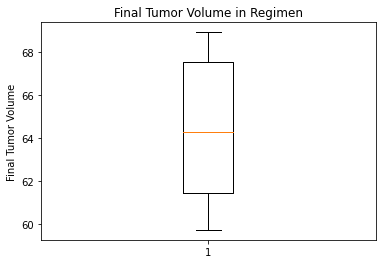

In [112]:
Volume = CeftaminTumorVolume['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Volume)
plt.show()

## Line and Scatter Plots

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
TimeVolumeCapomulin = CleanMiceGroup.loc[CleanMiceGroup["Drug Regimen"]=="Capomulin"]
TimeVolumeCapomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [114]:
s185Data = TimeVolumeCapomulin.loc[TimeVolumeCapomulin["Mouse ID"]=="s185"]
s185Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


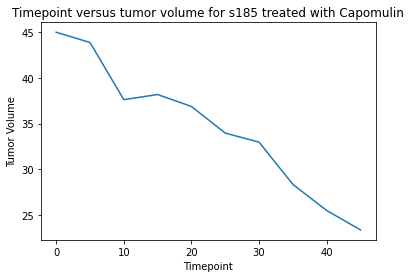

In [120]:
s185Timepoint = s185Data["Timepoint"]
s185Volume = s185Data["Tumor Volume (mm3)"]
plt.plot(s185Timepoint,s185Volume)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Timepoint versus tumor volume for s185 treated with Capomulin')
plt.show()

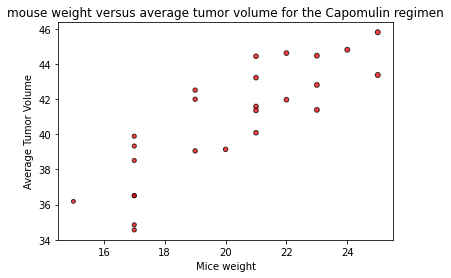

In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
miceWeight = TimeVolumeCapomulin.groupby(TimeVolumeCapomulin["Mouse ID"])["Weight (g)"].mean()
AvgTumorVolume = TimeVolumeCapomulin.groupby(TimeVolumeCapomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(miceWeight,AvgTumorVolume,marker="o",facecolors="red",edgecolors="black",s=miceWeight,alpha=0.75)
plt.xlabel("Mice weight")
plt.ylabel("Average Tumor Volume")
plt.title('mouse weight versus average tumor volume for the Capomulin regimen')
plt.show()

## Correlation and Regression

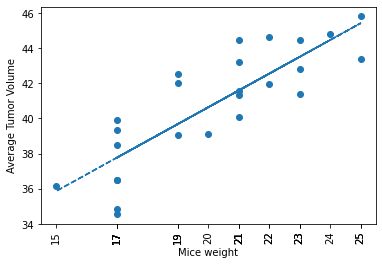

In [123]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
V_slope, V_int, V_r, V_p, V_std_err = stats.linregress(miceWeight, AvgTumorVolume)
V_fit = V_slope * miceWeight + V_int
plt.scatter(miceWeight,AvgTumorVolume)
plt.plot(miceWeight,V_fit,"--")
plt.xticks(miceWeight, rotation=90)
plt.xlabel("Mice weight")
plt.ylabel("Average Tumor Volume")
plt.show()

In [124]:
correlation = st.pearsonr(miceWeight,AvgTumorVolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
